<a href="https://colab.research.google.com/github/pfjapena/Porfolio/blob/main/1_Caracterizaci%C3%B3n_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se procede con la carga de las librerias de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Se procede con la carga de la base de datos

<ipython-input-21-6a8a6fc46644>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LDA)


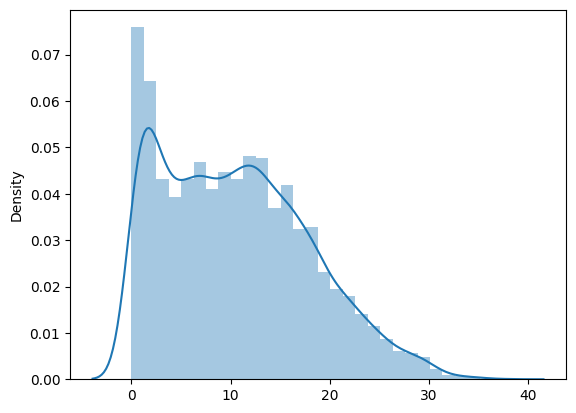

In [21]:
nxl='/content/0. SolicitantesCrédito(USD)_Años.xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
XDB=XDB[['Monto (EAD)','Prob.Default (PD)','LGD']]
XD=np.array(XDB)

#Se construye la distribución agregada de pérdidas
LDA=XD[:,0]*XD[:,1]*XD[:,2]

#Se procede con la gráficación de la distribución
plt.figure()
plt.hist(LDA,bins=10)
plt.show()

#Se puede gaficar de otra forma
plt.figure()
sns.distplot(LDA)
plt.show()

#Se procde con la caracterización de la distribución
print("Limite Superior Pérdidas Esperadas",np.mean(LDA))
print("Limite Inferior Pérdidas Catastróficas",np.percentile(LDA,99.99))
OpVar=np.percentile(LDA,99.99)

#Se procede con el recuento del número de pérdidas
EL=np.where(LDA<np.mean(LDA))
SL=np.where(LDA>OpVar)
UL=np.where((LDA>=np.mean(LDA)) & (LDA<=OpVar))

#Es importante determinar el coeficiente de asimetría
asimetria = np.mean((LDA - np.mean(LDA))**3) / np.std(LDA)**3
print("Coeficiente de asimetría:", asimetria)
